khaenan syabil Huda
221011402942
Kecepatan kipas yang disarankan: 80.56%


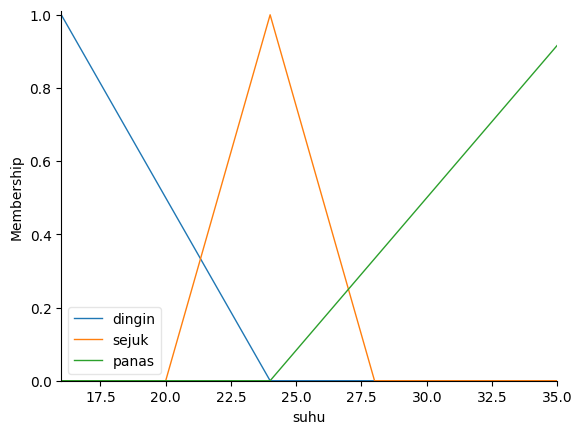

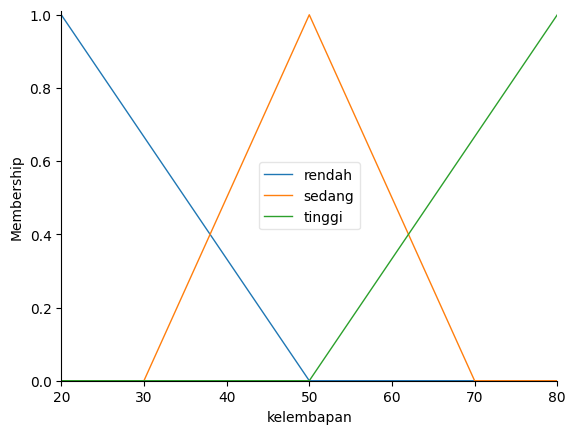

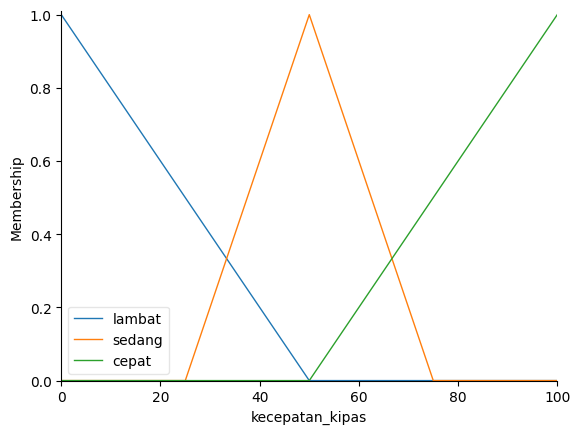

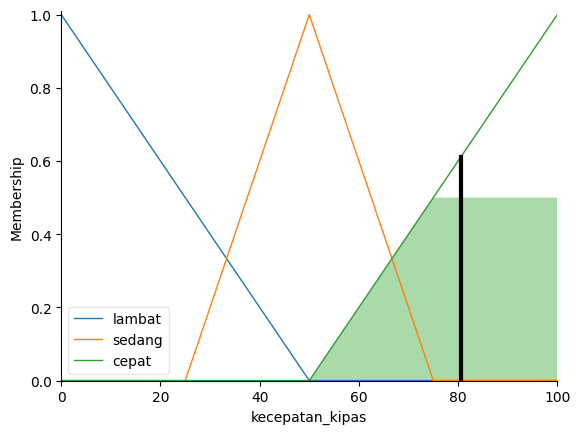

In [7]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy.control import Antecedent, Consequent, Rule, ControlSystem, ControlSystemSimulation
print(f"khaenan syabil Huda")
print(f"221011402942")


# Define fuzzy variables
suhu = Antecedent(np.arange(16, 36, 1), 'suhu')
kelembapan = Antecedent(np.arange(20, 81, 1), 'kelembapan')
kecepatan_kipas = Consequent(np.arange(0, 101, 1), 'kecepatan_kipas')

# Define fuzzy sets for suhu
suhu['dingin'] = fuzz.trimf(suhu.universe, [16, 16, 24])
suhu['sejuk'] = fuzz.trimf(suhu.universe, [20, 24, 28])
suhu['panas'] = fuzz.trimf(suhu.universe, [24, 36, 36])

# Define fuzzy sets for kelembapan
kelembapan['rendah'] = fuzz.trimf(kelembapan.universe, [20, 20, 50])
kelembapan['sedang'] = fuzz.trimf(kelembapan.universe, [30, 50, 70])
kelembapan['tinggi'] = fuzz.trimf(kelembapan.universe, [50, 80, 80])

# Define fuzzy sets for kecepatan kipas
kecepatan_kipas['lambat'] = fuzz.trimf(kecepatan_kipas.universe, [0, 0, 50])
kecepatan_kipas['sedang'] = fuzz.trimf(kecepatan_kipas.universe, [25, 50, 75])
kecepatan_kipas['cepat'] = fuzz.trimf(kecepatan_kipas.universe, [50, 100, 100])

# Define fuzzy rules
rule1 = Rule(suhu['dingin'] & kelembapan['rendah'], kecepatan_kipas['lambat'])
rule2 = Rule(suhu['dingin'] & kelembapan['sedang'], kecepatan_kipas['lambat'])
rule3 = Rule(suhu['dingin'] & kelembapan['tinggi'], kecepatan_kipas['sedang'])
rule4 = Rule(suhu['sejuk'] & kelembapan['rendah'], kecepatan_kipas['lambat'])
rule5 = Rule(suhu['sejuk'] & kelembapan['sedang'], kecepatan_kipas['sedang'])
rule6 = Rule(suhu['sejuk'] & kelembapan['tinggi'], kecepatan_kipas['cepat'])
rule7 = Rule(suhu['panas'] & kelembapan['rendah'], kecepatan_kipas['sedang'])
rule8 = Rule(suhu['panas'] & kelembapan['sedang'], kecepatan_kipas['cepat'])
rule9 = Rule(suhu['panas'] & kelembapan['tinggi'], kecepatan_kipas['cepat'])

# Create control system
ac_control_system = ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
ac_simulation = ControlSystemSimulation(ac_control_system)

# Input example
ac_simulation.input['suhu'] = 30
ac_simulation.input['kelembapan'] = 60

# Compute the output
ac_simulation.compute()

print(f"Kecepatan kipas yang disarankan: {ac_simulation.output['kecepatan_kipas']:.2f}%")

# Visualize fuzzy variables
suhu.view()
kelembapan.view()
kecepatan_kipas.view()

# Visualize the result
kecepatan_kipas.view(sim=ac_simulation)